In [1]:
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt
import numpy as np 
import pickle
from numpy import pi
import operator

In [2]:
creator.create("obj", base.Fitness, weights=(1.0,))
creator.create("Ind", list, fitness=creator.obj)

In [3]:
exp = 39
checkpoint_file="coarse_search_"+str(exp)+"/checkpoint.pkl"
with open(checkpoint_file, "rb") as cp_file:
    cp = pickle.load(cp_file)

In [4]:
def get_ind_list(pop_list, index):
    ind_list = [] 
    for pop in pop_list:
        ind_list.append(pop[index])
    return ind_list

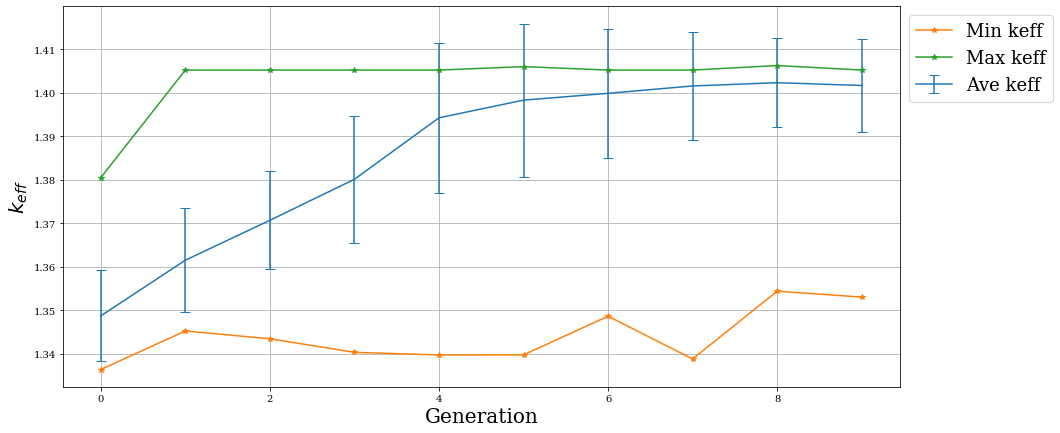

In [5]:
# keff plot
logbook = cp["logbook"]
gen = logbook.select("gen")
keff_avg = get_ind_list(logbook.chapters["oup"].select("avg"), 0)
keff_std = get_ind_list(logbook.chapters["oup"].select("std"), 0)
keff_min = get_ind_list(logbook.chapters["oup"].select("min"), 0)
keff_max = get_ind_list(logbook.chapters["oup"].select("max"), 0)
plt.rc('font', family='serif')
fig, ax = plt.subplots(figsize=(15,7))
ax.errorbar(gen, keff_avg, yerr=keff_std, label="Ave keff", capsize=5)
ax.plot(gen, keff_min, "*-", label="Min keff")
ax.plot(gen, keff_max, "*-", label="Max keff")
ax.set_xlabel("Generation", fontsize=20)
ax.set_ylabel(r"$k_{eff}$", fontsize=20)
ax.grid()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=18, bbox_to_anchor = [1.0, 1.0])
fig.savefig('keff_conv_'+str(exp)+'.png',bbox_inches='tight', dpi=300)

In [6]:
keff_max[-1]

1.4051988955788803

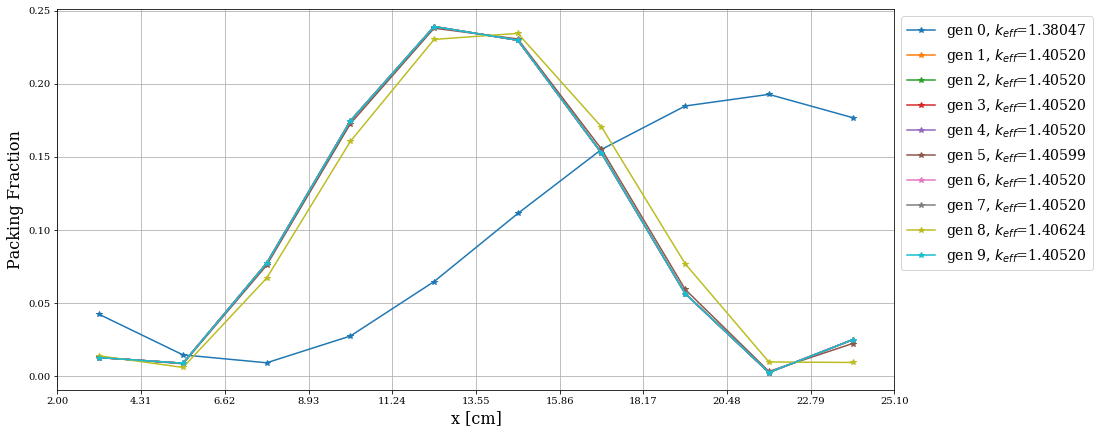

In [7]:
results = cp["all"]
T_pitch = 0.09266
vol_total = 23.1 * 2.55 * T_pitch * 20
vol_triso = 4 / 3 * np.pi * 4235e-5 ** 3
no_trisos = 0.0979 * vol_total / vol_triso
vol_slice = 2.31 * 2.55 * T_pitch * 20
plt.rc('font', family='serif')
fig, ax = plt.subplots(figsize=(15,7))
boundaries = np.arange(2,27.1,2.31)
midpoints = [] 
for x in range(len(boundaries)-1):
    midpoints.append((boundaries[x]+boundaries[x+1])/2)
midpoints = np.array(midpoints)
x = midpoints
keffs = results["outputs"]
colors = 2*["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan", "tab:blue","tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]
for i, pop in enumerate(results["populations"]):
    max_value = max(keffs[i], key = lambda t: t[0])
    max_index = keffs[i].index(max_value)
    min_value = min(keffs[i], key = lambda t: t[0])
    min_index = keffs[i].index(min_value)
    #print(max_index, max_value)
    for j, ind in enumerate(pop):
        sine = ind[0] * np.sin(ind[1]*x + ind[2]) + 2
        sine = sine / sum(sine) * no_trisos * vol_triso / vol_slice
        #ax.plot(x, sine, marker='*', color=colors[i])
        #print(ind)
        if j == max_index:
            #print(ind)
            #ax.text(x[-1]+0.7, sine[-1], "%f" %max_value, ha="center")
            ax.plot(x, sine, marker='*', color=colors[i],label="gen "+str(i)+ r", $k_{eff}$=" + "{:.5f}".format(max_value[0]))
        #if j == min_index:
        #    #print(ind)
        #    ax.text(x[-1]+0.7, sine[-1], "%f" %min_value, ha="center")
        #    ax.plot(x, sine, marker='*', color=colors[i])
ax.grid()
handles, labels = ax.get_legend_handles_labels()
if exp == 39:
    ax.legend(handles, labels, fontsize=14, bbox_to_anchor = [1.0, 1.0])
else:
    ax.legend(handles, labels, fontsize=14, bbox_to_anchor = [0.9, 1.0], ncol=2)
ax.set_xticks(np.arange(2,27.1,2.31))
ax.set_xlabel("x [cm]", fontsize=16)
ax.set_ylabel("Packing Fraction", fontsize=16)
fig.savefig('pf_'+str(exp)+'.png',bbox_inches='tight', dpi=300)

Text(0, 0.5, 'Packing Fraction')

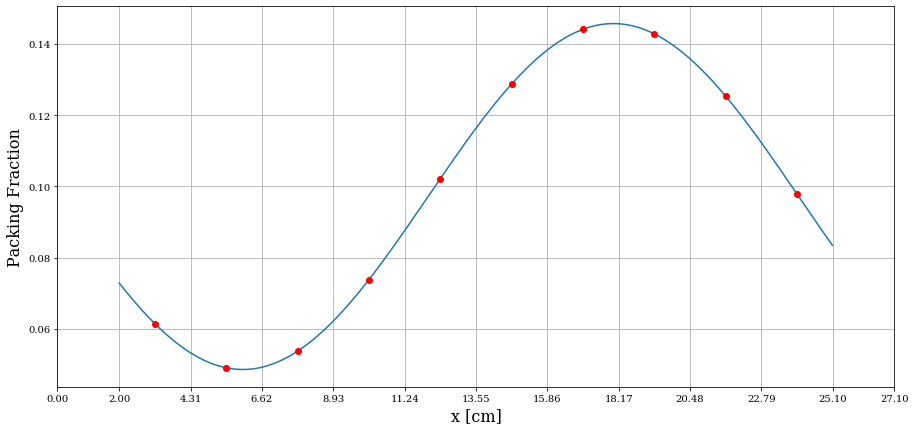

In [8]:
x = np.arange(2,25.1,0.01)
[a,b,c] = [1, np.pi/12, pi]
d = 2
sine = a * np.sin(b*midpoints+c) + d
y = a * np.sin(b*x+c) + d
y = y / sum(sine) * no_trisos * vol_triso / vol_slice
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(x, y)
for i,xx in enumerate(midpoints):
    yy = a * np.sin(b*xx+c) + d
    yy = yy / sum(sine) * no_trisos * vol_triso / vol_slice
    ax.plot(xx, yy,'ro')
ax.set_xticks(np.append(0,np.append(np.arange(2,27.1,2.31),27.1)))
ax.grid()
ax.set_xlim(0,27.1)
ax.set_xlabel("x [cm]", fontsize=16)
ax.set_ylabel("Packing Fraction", fontsize=16)